In [ ]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np



In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
x_train[0].shape

(28, 28)

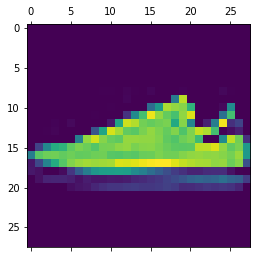

In [ ]:
plt.matshow(x_train[6])

In [ ]:
len(set(y_train))

10

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Build the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4947 - accuracy: 0.8263
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3763 - accuracy: 0.8657
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3377 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3152 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2952 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2797 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2677 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2594 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2477 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
train_loss, train_acc = model.evaluate(x_train, y_train)
print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2366 - accuracy: 0.9120
Test accuracy: 0.8773999810218811
Train accuracy: 0.9120333194732666


In [ ]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [ ]:
y_pred[6]

array([2.87599378e-05, 1.15019873e-06, 2.95941997e-02, 4.55717242e-07,
       9.58464444e-01, 1.12722915e-08, 1.19080953e-02, 3.89261783e-11,
       2.75915454e-06, 3.20677014e-12], dtype=float32)

In [ ]:
np.argmax(y_pred[6])

4

In [ ]:
y_test[3]

1

In [ ]:
y_pred_lab=[np.argmax(i) for i in y_pred]

In [ ]:
y_pred_lab[3]

1

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_lab)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[834,  17,  22,  19,   3,   0,  94,   0,  11,   0],
       [  1, 991,   0,   4,   1,   0,   2,   0,   1,   0],
       [ 15,   3, 863,  11,  58,   0,  47,   0,   3,   0],
       [ 10,  69,  17, 845,  25,   0,  25,   0,   9,   0],
       [  0,   9, 171,  25, 751,   0,  41,   0,   3,   0],
       [  0,   0,   0,   1,   0, 958,   0,  16,   1,  24],
       [124,  13, 112,  30,  70,   0, 635,   0,  16,   0],
       [  0,   0,   0,   0,   0,  15,   0, 958,   0,  27],
       [  2,   0,   2,   2,   2,   4,   4,   6, 978,   0],
       [  0,   0,   0,   0,   0,   5,   1,  33,   0, 961]], dtype=int32)>

Text(42.0, 0.5, 'Truth')

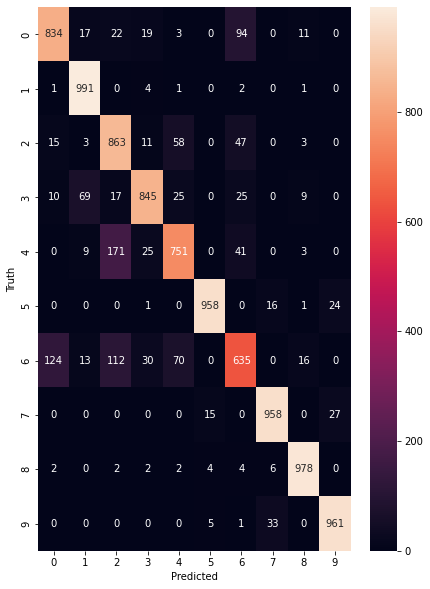

In [ ]:
import seaborn as sn
plt.figure(figsize=(7,10))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')